In [81]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats

In [82]:
dataset = pd.read_csv("AB_NYC_2019.csv")

In [83]:
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


In [84]:
### Check data types of all columns
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [85]:
###Checking null values
###Since last_review and reviews per month have same null records, lets assume that that listing never got ant review
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [86]:
###Let's replace reviews per month Nan by zero and null name and host_name by NoName. Also, replace last review with "Not reviewed"
dataset.fillna({'reviews_per_month':0}, inplace=True)
dataset.fillna({'name':"NoName"}, inplace=True)
dataset.fillna({'host_name':"NoName"}, inplace=True)
dataset.fillna({'last_review':"NotReviewed"}, inplace=True)


In [87]:
### Time to check results
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [88]:
### Looking at the price column
dataset["price"].describe()
### We see that the average price is $152. Price varies between $0 to $ 10K

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

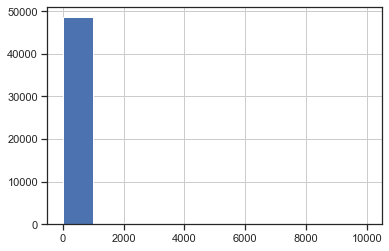

In [89]:
### See the distribution of price
hist_price=dataset["price"].hist()
### We observe that most listings have price less than $1000

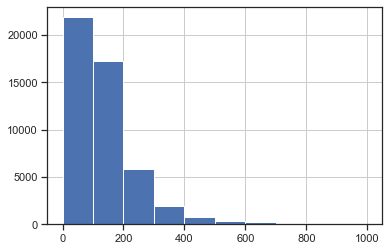

In [90]:
### Lets plot histogram for prices less than $2000
hist_price1=dataset["price"][dataset["price"]<1000].hist()
### This give a clearer picture!

In [91]:
### How many listings have price more than $1000?
dataset[dataset["price"]>1000]
### 239 listings have price per day > $1000. These are either super lavish listings or there was an error during input. Nonetheless, since this records are skewing our data a lot, we will treat them as outliers and drop them.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,5/5/2018,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,9/25/2018,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NotReviewed,0.00,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NotReviewed,0.00,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,1/28/2016,0.71,11,364
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NotReviewed,0.00,1,83
2018,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.72668,-73.98179,Entire home/apt,2500,30,15,7/1/2019,0.26,1,89
2236,1056256,Beautiful eco triplex w/green roof. Free yoga/...,462379,Loretta,Brooklyn,Carroll Gardens,40.67881,-73.99379,Entire home/apt,1395,1,55,6/2/2019,0.73,2,362
2520,1300097,"Marcel the Shell with Shoes On or Off, Whatever",4069241,Shannon,Brooklyn,Brooklyn Heights,40.69424,-73.99313,Private room,1500,1,0,NotReviewed,0.00,1,0
2523,1301321,West Village Penthouse-terrace/view,2214774,Ben And Jess,Manhattan,West Village,40.73305,-74.00412,Entire home/apt,1899,7,18,10/9/2015,0.28,1,0


In [92]:
dataset=dataset[dataset["price"]<1000]

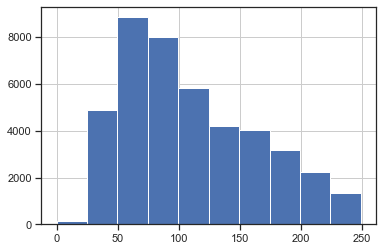

In [93]:
### We see a more Gaussian distribution here
hist_price2=dataset["price"][dataset["price"]<250].hist()


In [94]:
### We use 250 as threshold price 
dataset=dataset[dataset["price"]<250]

In [95]:
### Looking at the price column again
dataset["price"].describe()
### We see that the average price is $107. Price varies between $0 to $249

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [96]:
###There are 221 unique neighbourhoods in NYC as per this data set. Most listings are in Williamsburg
dataset['neighbourhood'].value_counts()

Bedford-Stuyvesant            3560
Williamsburg                  3451
Harlem                        2487
Bushwick                      2404
Upper West Side               1570
Upper East Side               1515
East Village                  1503
Hell's Kitchen                1501
Crown Heights                 1462
East Harlem                   1031
Greenpoint                    1018
Midtown                        920
Washington Heights             870
Astoria                        861
Lower East Side                768
Chelsea                        759
Flatbush                       600
Financial District             562
Prospect-Lefferts Gardens      515
Clinton Hill                   509
West Village                   501
Long Island City               494
East Flatbush                  485
Fort Greene                    434
Park Slope                     428
Ridgewood                      417
Flushing                       409
Kips Bay                       371
Sunset Park         

In [97]:
### Count how many neighbourhoods appear more than 200
dfnh =dataset.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 200)


In [98]:
### Most data is covered. 
len(dfnh["neighbourhood"])

36106

In [99]:
### Count how many neighbourhoods appear only once
dfnh =dataset.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() == 1)
len(dfnh["neighbourhood"])

5

In [100]:
###Lets look at neighbourhood groups
dataset['neighbourhood_group'].value_counts()
###There are five major neighbourhood groups in NYC with Manhattan and Brooklyn accounting for 85% of the listings

Brooklyn         18581
Manhattan        17270
Queens            5413
Bronx             1052
Staten Island      353
Name: neighbourhood_group, dtype: int64

In [101]:
### Lets see the average listing price by neighbourhood group
ng_price=dataset.groupby("neighbourhood_group")["price"].mean()

In [102]:
### Manhattan is most expensive and Bronx is the least expensive place to live
ng_price

neighbourhood_group
Bronx             73.796578
Brooklyn          98.068134
Manhattan        128.670990
Queens            83.639941
Staten Island     82.606232
Name: price, dtype: float64

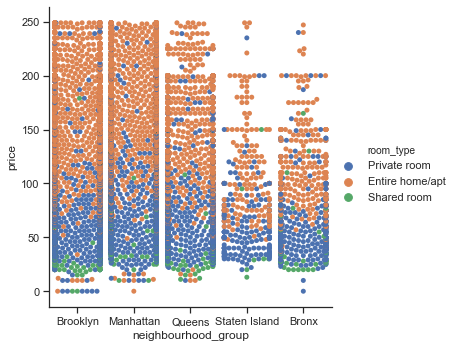

In [33]:
### Lets see the distributuion of price and neighbourhood group. 
sns.catplot(x="neighbourhood_group",y="price",hue="room_type", kind="swarm", data=dataset);
### Here we can note that Brooklyn and Manhattan tend to have more listings with price>150
### We also note thar most listings above price>100 are entire home type followed by private room and shared room which is the cheapest.

In [103]:
### Checking if there are duplicate host_ids and whats is the maximum number of listings per host_id
df = dataset.groupby(["host_id"])
max(df.size())


238

In [104]:
## Here we can see that 32K host_ids are unique appearing only once whereas some host_ids appear as much as 238 times
df.size().value_counts().head()

1    28391
2     2993
3      844
4      302
5      151
dtype: int64

In [105]:
df.size().value_counts().tail()

45     1
30     1
238    1
16     1
87     1
dtype: int64

In [106]:
### Finding the host_id with maximum listings
host_id_counts = dataset["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

219517861

In [107]:
###We see that Sonder(NYC) has the max number of listings
dataset[dataset["host_id"]==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,5/29/2019,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,5/21/2019,0.60,327,159
39771,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,6/8/2019,0.94,327,137
39772,30937595,Sonder | 11th Ave | Bright 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,6/20/2019,1.00,327,281
39773,30937596,Sonder | 11th Ave | Contemporary 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,6/10/2019,1.00,327,332
39775,30937598,Sunny 1BR in Hell's Kitchen by Sonder,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76079,-73.99807,Entire home/apt,189,29,1,6/8/2019,0.94,327,325
39776,30937740,Sonder | The Nash | Airy Studio + Fitness Center,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74896,-73.97472,Entire home/apt,228,2,5,6/19/2019,0.91,327,111
39777,30937747,Sonder | The Nash | Bohemian Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74737,-73.97420,Entire home/apt,240,2,4,6/1/2019,1.06,327,99
39778,30937750,Sonder | The Nash | Simple Studio + Gym,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74846,-73.97448,Entire home/apt,241,2,4,6/3/2019,1.30,327,130
39781,30937762,Sonder | The Nash | Charming Studio + Gym,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74909,-73.97585,Entire home/apt,243,2,6,6/21/2019,1.09,327,153


In [108]:
### Listing id and Host name are not useful for our analysis so I will drop them
dataset = dataset.drop(columns = ["id","host_name"])

In [109]:
### Let's Analyse the listing name column
dataset["name_length"]=dataset['name'].map(str).apply(len)


In [110]:
###Max and Min name length
print(dataset["name_length"].max())
print(dataset["name_length"].min())
print(dataset["name_length"].idxmax())
print(dataset["name_length"].idxmin())


179
1
25832
4033


In [111]:
### Max name 
dataset.at[25832, 'name']

'The printing studio bedroom with garden in Bedstuy  !!Brooklyn. Historic neighborhood close to everything ! Full kitchen bathroom BBQ and porch at your disposal. Learn to print !!'

In [112]:
###Min name
dataset.at[4033, 'name']

'/'

In [113]:
### Let's figure if name length has an impact on how much it is noticed. We can assume higher number of reviews mean more people lived there and hence more people "noticed" the listing
dataset["name_length"].corr(dataset["number_of_reviews"])


-0.005912016088329704

In [114]:
###There is hardly any correlation there. Lets try between price and name length 
dataset["name_length"].corr(dataset["price"])

0.05685141340720258

In [115]:
### Lets look at room_type variable
dataset['room_type'].value_counts()
### Most listings are either Entire home or Private room

Private room       21753
Entire home/apt    19790
Shared room         1126
Name: room_type, dtype: int64

In [116]:
### Average price per room_type
rt_price = dataset.groupby("room_type")["price"].mean()

In [117]:
### Entire room has the highest price and shared room has lowest avg price which makes sense.
rt_price

room_type
Entire home/apt    144.977211
Private room        76.802832
Shared room         56.925400
Name: price, dtype: float64

In [118]:
### Analysing minimum nights
### Again, range is between 1 night to 1250 nights. Quite odd, lets investigate
dataset["minimum_nights"].describe()

count    42669.000000
mean         6.856359
std         19.981924
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

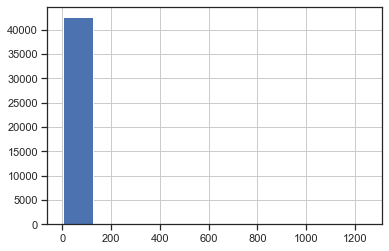

In [119]:
### Analysing minimum nights
### We see most values are between 1 to 100
hist_mn=dataset["minimum_nights"].hist()
hist_mn

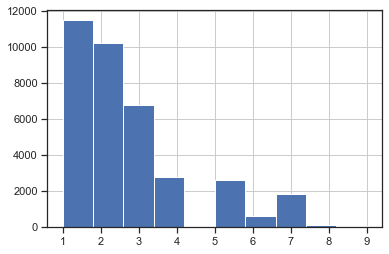

In [120]:
### Closer look
hist_mn1=dataset["minimum_nights"][dataset["minimum_nights"]<10].hist()
hist_mn1

In [121]:
dataset["minimum_nights"][dataset["minimum_nights"]>30]

6         45
14        90
36        60
81        31
106       90
155       45
245      200
247       50
336       35
349       90
441       40
446       31
457       40
469       44
481       65
566       90
655       60
667      120
694       90
700      365
712       31
719      180
724       90
754      365
757      122
769      180
823       60
970      240
1038     180
1045      88
        ... 
45705     31
45744     31
45852     31
45861     33
45926     70
46072     31
46082     70
46192     60
46302     31
46362     31
46470     91
46661     31
47098     31
47101     31
47262     31
47506     31
47620    500
47745    120
47808     31
47875     31
47931     31
47973     90
48010     31
48145     90
48205    180
48312     90
48325     60
48368     60
48446    365
48752     32
Name: minimum_nights, Length: 628, dtype: int64

In [122]:
### We replace all records with min nights > 30 by 30
dataset.loc[(dataset.minimum_nights >30),"minimum_nights"]=30


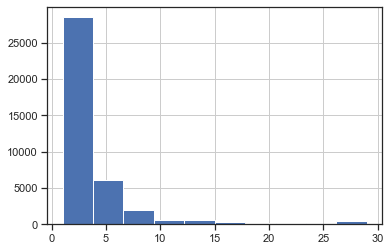

In [123]:
hist_mn2=dataset["minimum_nights"][dataset["minimum_nights"]<30].hist()
hist_mn2

In [124]:
### Does minimum_nights have impact on price?
dataset["minimum_nights"].corr(dataset["price"])

0.05955436171912435

In [125]:
###Finally lets analyse availability_365 column
dataset["availability_365"].describe()

count    42669.000000
mean       107.622747
std        129.731981
min          0.000000
25%          0.000000
50%         37.000000
75%        211.000000
max        365.000000
Name: availability_365, dtype: float64

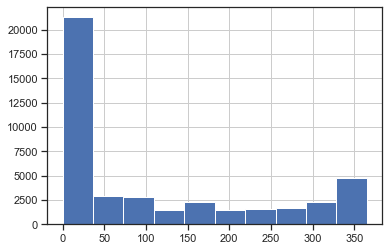

In [126]:
hist_av=dataset["availability_365"].hist()
hist_av

In [127]:
### After analysis, I have decided to drop these columns as they will not be useful in prediction
dataset.drop(["name",'last_review',"latitude",'longitude'], axis=1, inplace=True)

In [128]:
### Dropping host_id
dataset.drop(["host_id"], axis=1, inplace=True)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

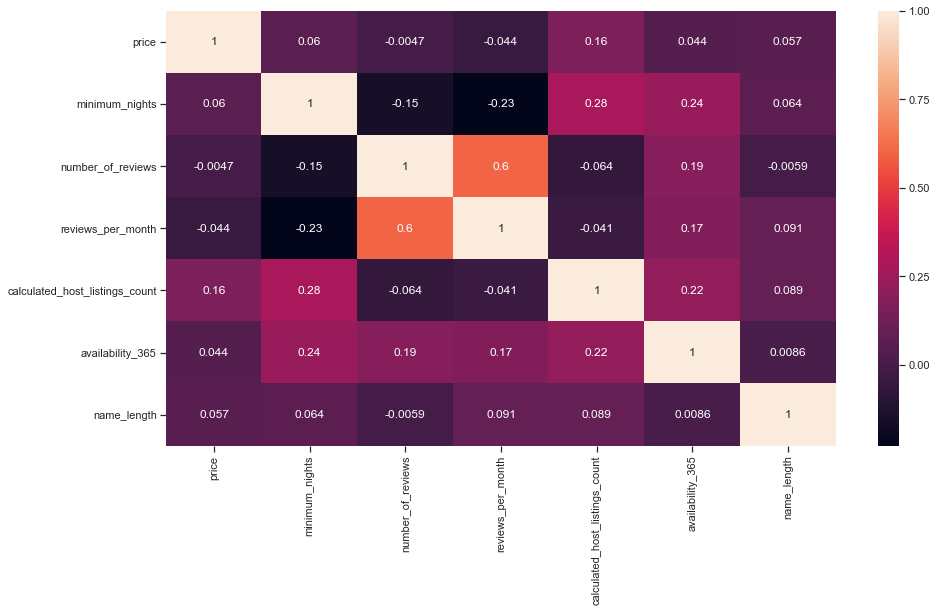

In [129]:
### Plotting correlation matrix 
corr = dataset.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns

In [130]:
### Lets check out data one more time before beginning prediction. 
###Looks good!
dataset.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_length                         int64
dtype: object

In [131]:
### Let us start with basic Linear Regression to create a base line model 

In [132]:
## lets try without neighbourhood column
### Making dummies for neighbourhood group and room_type
dataset_onehot1 = pd.get_dummies(dataset, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"])
dataset_onehot1.drop(["neighbourhood"], axis=1, inplace=True)

In [133]:
### Checking dataframe shape
dataset_onehot1.shape

(42669, 15)

In [134]:
X1= dataset_onehot1.loc[:, dataset_onehot1.columns != 'price']

In [135]:
Y1 = dataset_onehot1["price"]

In [136]:
### Splitting into training and testing data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)

In [137]:
### Fitting Linear regression
reg1 = LinearRegression().fit(x_train1, y_train1)

In [138]:
### R squared value
reg1.score(x_train1, y_train1)

0.5033463567588996

In [139]:
### Coefficients
reg1.coef_

array([-8.09633371e-01, -9.00784117e-03, -1.61792266e+00,  1.42431633e-01,
        4.67844610e-02,  1.99639104e-01, -1.47732036e+01,  5.03119092e+00,
        2.93962304e+01, -5.08494404e+00, -1.45692736e+01,  5.15765740e+01,
       -1.40640543e+01, -3.75125197e+01])

In [140]:
### Predicting 
y_pred1 = reg1.predict(x_test1)

In [141]:
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train1.columns
Coeff1["Coefficient"]=reg1.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
13,rt_Shared room,-37.512520
6,ng_Bronx,-14.773204
10,ng_Staten Island,-14.569274
12,rt_Private room,-14.064054
9,ng_Queens,-5.084944
2,reviews_per_month,-1.617923
0,minimum_nights,-0.809633
1,number_of_reviews,-0.009008
4,availability_365,0.046784
3,calculated_host_listings_count,0.142432


In [151]:
### Calculate RMSE
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
rmse1

37.68939882420686

In [143]:
### Taking a closer look at the estimates
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())
### Lets interpret the results
#1. We first note that the R squared value is 0.503 i.e. 50.3%. This means that our variables are able to explain 50% variation
#in the price 
#2. We see that the y intercept is 47.46. We interpret it as keeping all other variables as zero, the average price of
#a listing is $47.46
#3. Now lets move to the coefficients, we see that coefficient for "rt_Entire home/apt" is 67.39. This means that holding 
#all other variables constant, the price of an Entire Apt is intercept+coefficient which is $114
#4. We can interpret other cooefficients in similar way depending on their sign.
#5. We can see that most variables have p values below 0.05. So we can say that these variables are significant.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2882.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:59:39   Log-Likelihood:            -1.7259e+05
No. Observations:               34135   AIC:                         3.452e+05
Df Residuals:                   34122   BIC:                         3.453e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\amitd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [144]:
## No of reviews is not significant and does not help our model much. Drop it
x_train1.drop(["number_of_reviews"], axis=1,inplace=True)
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())
### Does not improve our model much

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3143.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:59:40   Log-Likelihood:            -1.7259e+05
No. Observations:               34135   AIC:                         3.452e+05
Df Residuals:                   34123   BIC:                         3.453e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\amitd\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [145]:
### Lets try to use the neighbourhood variable. It has more than 200 distinct values. 
###Hence, when we create dummies we will have large number of variables.
dataset_onehot2 = pd.get_dummies(dataset, columns=['neighbourhood_group',"neighbourhood","room_type"], prefix = ['ng',"nh","rt"])


In [146]:
XL1= dataset_onehot2.loc[:, dataset_onehot2.columns != 'price']
YL1 = dataset_onehot2["price"]
x_trainL11, x_testL11, y_trainL11, y_testL11 = train_test_split(XL1, YL1, test_size=0.20, random_state=42)

In [147]:
### We will use Lasso regression because it has the ability to nullify parameters that do not improve the model.
### Also, the dataset isn't large enough and hence Lasso is a good choice as it would add a little bit bias but reduce 
### variance greatly
### Starting with alpha=0.1
### We can use crossvalidation and check for many values for alpha to find best one, but I will save this process for the next model
### which I think will procduce better results.
regL1 = Lasso(alpha=0.01)
regL1.fit(x_trainL11, y_trainL11) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
### R squared
### This regularised model did way better than normal linear regression
regL1.score(x_trainL11, y_trainL11)

0.5672903617463165

In [152]:
### RMSE
### Smaller value than earlier
y_predL1= regL1.predict(x_testL11)
print(np.sqrt(metrics.mean_squared_error(y_testL11,y_predL1)))

35.12428625156702


In [ ]:
### We can see that some parameters have zero coefficients.
regL1.coef_

In [154]:
CoeffLS1 = pd.DataFrame(columns=["Variable","Coefficients"])
CoeffLS1["Variable"]=x_trainL11.columns
CoeffLS1["Coefficients"]=regL1.coef_
CoeffLS1.sort_values("Coefficients", ascending = False)

,Variable,Coefficients
230,rt_Entire home/apt,61.728975
8,ng_Manhattan,43.648605
214,nh_Vinegar Hill,32.468641
64,nh_DUMBO,32.422917
36,nh_Brooklyn Heights,29.369077
68,nh_Downtown Brooklyn,25.403818
91,nh_Fort Greene,24.284074
161,nh_Park Slope,24.038666
42,nh_Carroll Gardens,23.970950
224,nh_Williamsburg,22.795908


In [631]:
### Finally, lets try Random forest regressor which I believe will give best results

In [638]:
### Initially, lets build a tree without any constraints.
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_trainL11, y_trainL11)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [639]:
### We get R squared value at 93.6%! There is obviously a problem of overfitting:(
print(regrRM.score(x_trainL11, y_trainL11))
y_predL1= regrRM.predict(x_testL11)
print(np.sqrt(mean_squared_error(y_testL11,y_predL1)))

0.9359133611796862
34.851893481122865


In [642]:
### Using feature importance, we can see which feature had most weight
regrRM.feature_importances_

array([5.21265792e-02, 5.79372893e-02, 7.71779855e-02, 3.67593121e-02,
       7.30175613e-02, 8.42691072e-02, 8.06088359e-04, 3.71231913e-03,
       6.06111250e-02, 1.10962273e-03, 2.49401246e-04, 2.10460640e-04,
       5.99300073e-07, 9.78765708e-05, 2.81922175e-04, 1.24518410e-03,
       2.60045575e-05, 2.31238253e-04, 6.93874130e-04, 4.08306213e-05,
       1.47643978e-05, 3.81263856e-06, 2.30806405e-04, 7.42162007e-05,
       3.07980228e-03, 4.31178108e-04, 4.17403906e-05, 2.38031074e-04,
       2.41985149e-04, 1.51573749e-04, 7.87756145e-04, 3.46370476e-04,
       1.29179131e-04, 3.14829191e-04, 2.76596193e-04, 1.65364856e-05,
       1.49698510e-03, 1.52066405e-04, 7.79380825e-06, 2.36605405e-03,
       8.61025284e-05, 4.20028460e-04, 1.41229529e-03, 9.87020957e-06,
       6.67525401e-05, 2.58597031e-03, 9.38909968e-04, 5.79833821e-05,
       2.28195975e-04, 9.49393030e-05, 1.06931441e-05, 1.19498043e-04,
       1.96450448e-03, 7.09426018e-07, 4.89706853e-04, 4.91089425e-05,
      

In [645]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=x_trainL11.columns
CoeffRM1["FeatureImportance"]=regrRM.feature_importances_
CoeffRM1.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
230,rt_Entire home/apt,4.120504e-01
5,name_length,8.426911e-02
2,reviews_per_month,7.717799e-02
4,availability_365,7.301756e-02
8,ng_Manhattan,6.061112e-02
1,number_of_reviews,5.793729e-02
0,minimum_nights,5.212658e-02
3,calculated_host_listings_count,3.675931e-02
224,nh_Williamsburg,1.059404e-02
216,nh_Washington Heights,9.625169e-03


In [676]:
regrRM.get_params()

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

In [662]:
### Lets see what we can do to prevent overfitting
##1. We will set max depth to 50. This ensures that branching stops after 50th branching, otherwise each sample may have its branch and overfit.
#2. We will use min_samples_split as 5. The default value is 2. This means that each internal node will split as long as it has a minimum of two sample. We dont want that!
#3. We will use min_samples_leaf as 4. The default is 1. This means that a node is considered leaf node if it has just one sample. This can cause severe overfitting!
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_trainL11, y_trainL11)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [664]:
### We get a smaller value for R squared
print(regrRM2.score(x_trainL11, y_trainL11))
y_predL1= regrRM2.predict(x_testL11)
print(np.sqrt(mean_squared_error(y_testL11,y_predL1)))

0.7709906403344584
34.33666679971848


In [665]:
CoeffRM2 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM2["Variable"]=x_trainL11.columns
CoeffRM2["FeatureImportance"]=regrRM2.feature_importances_
CoeffRM2.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
230,rt_Entire home/apt,5.215371e-01
8,ng_Manhattan,7.625210e-02
4,availability_365,6.200427e-02
2,reviews_per_month,5.774372e-02
5,name_length,5.621656e-02
1,number_of_reviews,4.273211e-02
0,minimum_nights,4.182192e-02
3,calculated_host_listings_count,3.270845e-02
224,nh_Williamsburg,1.346459e-02
216,nh_Washington Heights,1.214274e-02


In [672]:
### To find best values for the RF parameters, let us use cross validation
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [677]:
print(rm_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [679]:
import time

In [681]:
# Use the random grid to search for best hyperparameters
t1 = time.time()
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(x_trainL11, y_trainL11)
t2 =time.time()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 77.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 172.4min finished


In [683]:
### Time taken
(t2-t1)/60


173.57128819624583

In [684]:
### Here we can Best parameters for the best model
rf2_random.best_params_

{'n_estimators': 822, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

In [685]:
### Final R squared value
rf2_random.score(x_trainL11, y_trainL11)

0.7814628969412237

In [686]:
### We finally have the least RMSE among all model!
y_predL1= rf2_random.predict(x_testL11)
print(np.sqrt(mean_squared_error(y_testL11,y_predL1)))

33.854222507910826


In [67]:
### Finally lets compare all models
### Including models from my previous project with pyspark
rmsedt = {"Model":["RF1_Sprk","RF2_Sprk","RF3_Sprk","LR","L1","RFR"],"RMSE":[71.55745125705758,65.7207885074504
,62.51297007998151,37.68939882420686,35.12428625156702,33.854222507910826]}
rmsedf = pd.DataFrame(rmsedt)
rsqdt = {"Model":["LR","L1","RFR"],"RSquared":[50.3,56.7,78.14]}
rsqdt = pd.DataFrame(rsqdt)

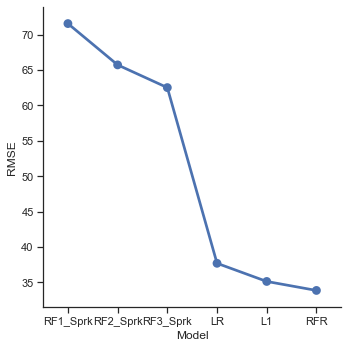

In [71]:
sns.catplot(x="Model", y="RMSE", linestyles=["-"],
            kind="point", data=rmsedf);

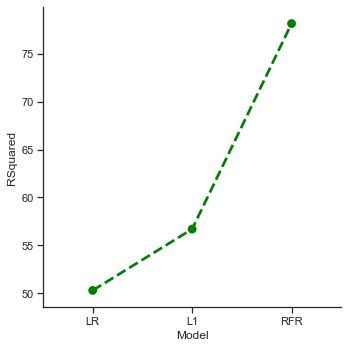

In [76]:
sns.catplot(x="Model", y="RSquared", linestyles=["--"], color ="green", kind="point", data=rsqdt);